##### 1. The Purpose Of The Notebook

The purpose of this notebook is to gain an undersatnding into trends in alcohol consumption over time, identifying factors that influence alcohol consumption, and analyzing the impacts of alcohol on public health and social issues.

##### 2. Loading & Understanding The Data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("World Alcoholic Consumption datasets.csv", delimiter=';', skiprows=0, low_memory=False)
df.head()

,Gender,Count,Countries,Countries Code,Date
0,Female,1,Japan,JP,12/25/2019
1,Female,2,Czech Republic,CZ,12/22/2019
2,Male,3,Portugal,PT,12/28/2019
3,Female,4,Netherlands,NL,2012/01/19
4,Female,5,Argentina,AR,12/24/2019


In [3]:
df.tail()

,Gender,Count,Countries,Countries Code,Date
12495,Male,996,Russia,RU,2011/09/19
12496,Male,997,China,CN,3/20/2019
12497,Male,998,China,CN,4/21/2019
12498,Female,999,Philippines,PH,3/20/2019
12499,Female,1000,Sweden,SE,11/16/2019


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# Display the shape of the data
print("Rows : ", df.shape[0], "\n", "Columns :", df.shape[1])

Rows :  12500 
 Columns : 5


In [6]:
# Display the column datatypes
df.dtypes

Gender            object
Count              int64
Countries         object
Countries Code    object
Date              object
dtype: object

In [7]:
# Get more inffo on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          12500 non-null  object
 1   Count           12500 non-null  int64 
 2   Countries       12500 non-null  object
 3   Countries Code  12491 non-null  object
 4   Date            12500 non-null  object
dtypes: int64(1), object(4)
memory usage: 488.4+ KB


In [8]:
# Get Statistical description of the data
df.describe()

,Count
count,12500.000000
mean,490.500000
std,288.513274
min,1.000000
25%,241.000000
50%,481.000000
75%,740.000000
max,1000.000000


##### 3. Data Preparation

In [9]:
# Look for any duplicates
df.duplicated().sum()

0

In [10]:
# Look for missing values
df.isnull().sum()

Gender            0
Count             0
Countries         0
Countries Code    9
Date              0
dtype: int64

In [11]:
# Drop Missing Values 
df.dropna(axis='columns', inplace=True)

In [12]:
# Convert date column to datetime
df["Date"] = pd.to_datetime(df['Date'])

In [13]:
# Create "Year" & "Month" columns 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Gender,Count,Countries,Date,Year,Month
0,Female,1,Japan,2019-12-25,2019,12
1,Female,2,Czech Republic,2019-12-22,2019,12
2,Male,3,Portugal,2019-12-28,2019,12
3,Female,4,Netherlands,2012-01-19,2012,1
4,Female,5,Argentina,2019-12-24,2019,12


In [14]:
df.Countries.unique()

array(['Japan', 'Czech Republic', 'Portugal', 'Netherlands', 'Argentina',
       'France', 'Nicaragua', 'Brazil', 'Afghanistan', 'Greece',
       'Indonesia', 'Russia', 'China', 'Ukraine', 'United States', 'Peru',
       'Sweden', 'Bosnia and Herzegovina', 'Madagascar', 'Mexico',
       'Belarus', 'Cyprus', 'Philippines', 'El Salvador', 'Vietnam',
       'Bangladesh', 'Tanzania', 'Norway', 'Uganda', 'Italy', 'Poland',
       'Honduras', 'Panama', 'Macedonia', 'Dominican Republic',
       'Mauritania', 'Bhutan', 'Samoa', 'Ecuador', 'Colombia', 'Morocco',
       'Micronesia', 'Cuba', 'Iran', 'New Caledonia', 'Malaysia',
       'Thailand', 'Croatia', 'Haiti', 'Germany', 'Tunisia', 'Cambodia',
       'Canada', 'Moldova', 'Comoros', 'Iraq', 'Malta', 'Cameroon',
       'Egypt', 'Armenia', 'Albania', 'Uruguay', 'Nigeria', 'Israel',
       'Mongolia', 'New Zealand', 'Pakistan', 'Libya', 'Niger',
       'Venezuela', 'Central African Republic', 'Kenya', 'South Africa',
       'Burundi', 'Syria',

In [15]:
df['Continent']=df.Countries.map({'Japan':'Asia', 'Czech Republic': 'Europe', 'Portugal':'Europe',
                             'Netherlands':'Europe','Argentina': 'South America', 'France': 'Europe',
                             'Nicaragua':'North America', 'Brazil':'South America', 'Afghanistan': 'Asia',
                             'Greece':'Europe','Indonesia':'Asia', 'Russia':'Europe', 'China':'Asia',
                             'Ukraine':'Europe', 'United States':'North America','Peru':'South America',
                             'Sweden':'Europe', 'Bosnia and Herzegovina':'Europe','Madagascar':'Africa',
                             'Mexico': 'North America', 'Belarus':'Europe', 'Cyprus':'Europe','Philippines':'Asia',
                             'El Salvador': 'North America', 'Vietnam':'Asia','Bangladesh':'Asia',
                             'Tanzania':'Africa','Norway':'Europe','Uganda':'Africa','Italy':'Europe',
                             'Poland':'Europe','Honduras':'North America', 'Panama':'North America',
                             'Macedonia':'Europe','Dominican Republic':'North America','Mauritania':'Africa',
                             'Bhutan':'Asia','Samoa':'Oceania','Ecuador':'South America', 'Colombia':'South America',
                             'Morocco':'Africa','Micronesia':'Oceania','Cuba':'North America','Iran':'Asia',
                             'New Caledonia':'Oceania','Malaysia':'Asia','Thailand':'Asia','Croatia':'Europe',
                             'Haiti':'North America', 'Germany':'Europe','Tunisia':'Africa', 'Cambodia':'Asia',
                             'Canada':'North America', 'Moldova':'Europe', 'Comoros':'Africa','Iraq':'Asia',
                             'Malta':'Europe','Cameroon':'Africa','Egypt':'Africa','Armenia':'Asia','Albania':'Europe',
                             'Uruguay':'South America','Nigeria':'Africa', 'Israel':'Asia','Mongolia':'Asia',
                             'New Zealand':'Oceania','Pakistan':'Asia', 'Libya':'Africa','Niger':'Africa',
                             'Venezuela':'South America','Central African Republic':'Africa',
                             'Kenya':'Africa','South Africa':'Africa', 'Burundi':'Africa', 'Syria':'Asia',
                             'Costa Rica':'North America','Slovenia':'Europe','Ethiopia':'Africa', 'Kazakhstan':'Asia',
                             'North Korea':'Asia','Uzbekistan':'Asia','South Korea':'Asia','Kiribati':'Oceania',
                             'Mozambique':'Africa','Burkina Faso':'Africa','Benin':'Africa','Ivory Coast':'Africa',
                             'Georgia':'Europe','Guyana':'South America', 'Bulgaria':'Europe','Kyrgyzstan':'Asia',
                             'Palestinian Territory':'Asia', 'Azerbaijan':'Europe', 'Hungary':'Europe',
                             'Serbia':'Europe','Somalia':'Africa','Spain':'Europe','Yemen':'Asia','Nepal':'Asia',
                             'Guatemala':'North America', 'Sierra Leone':'Africa',  'American Samoa':'Oceania',
                             'Saudi Arabia':'Asia', 'Gambia':'Africa', 'Myanmar':'Asia', 'Mauritius':'Africa',
                             'Ghana':'Africa','Finland':'Europe','Saint Lucia':'North America',
                             'Bolivia':'South America','Austria':'Europe', 'Botswana':'Africa',
                             'Democratic Republic of the Congo':'Africa','Senegal':'Africa','Bahamas':'North America',
                             'Republic of the Congo':'Africa','Chile':'South America','Latvia':'Europe',
                             'Zimbabwe':'Africa', 'Brunei':'Asia','Turkmenistan':'Asia', 'Grenada':'North America',
                             'Tajikistan':'Asia','Switzerland':'Europe','Jordan':'Asia','Ireland':'Europe',
                             'Sudan':'Africa','Guinea':'Africa','East Timor':'Asia','Mali':'Africa','Estonia':'Europe',
                             'Denmark':'Europe','Solomon Islands':'Oceania','Taiwan':'Asia','Australia':'Oceania',
                             'Mayotte':'Africa','Cape Verde':'Africa','Montenegro':'Europe','Seychelles':'Africa',
                             'United Kingdom':'Europe','Suriname':'South America','Angola':'Africa','Belgium':'Europe',
                             'Chad':'Africa', 'Iceland':'Europe','Niue':'Oceania','Papua New Guinea':'Oceania',
                             'Lesotho':'Africa','Malawi':'Africa','Lithuania':'Europe', 'Qatar':'Asia',
                             'Curacao':'South America','Luxembourg':'Europe', 'Liberia':'Africa','Zambia':'Africa',
                             'Paraguay':'South America','Sri Lanka':'Asia','Jamaica':'North America','Namibia':'Africa',
                             'French Guiana':'South America','Swaziland':'Africa','Lebanon':'Asia',
                             'Belize':'North America','Hong Kong':'Asia', 'Marshall Islands':'Oceania','Andorra':'Europe',
                             'Greenland':'North America', 'Tonga':'Oceania','Rwanda':'Africa','Guinea-Bissau':'Africa',
                             'Kosovo':'Europe', 'Togo':'Africa','Palau':'Oceania','Djibouti':'Africa',
                             'United Arab Emirates':'Asia','Trinidad and Tobago':'South America','Kuwait':'Asia',
                             'India':'Asia','Eritrea':'Africa','Liechtenstein':'Europe','Barbados':'North America',
                             'Oman':'Asia','Gabon':'Africa','French Polynesia':'Oceania', 'Laos': 'Asia',
                             'Saint Kitts and Nevis':'North America','Aland Islands':'Europe','Turkey':'Europe',
                             'Anguilla':'North America', 'Turks and Caicos Islands':'North America',
                             'British Virgin Islands':'North America','Bonaire, Saint Eustatius and Saba ':'South America',
                             'Guadeloupe':'North America', 'Dominica':'North America','Martinique':'North America',
                             'Guam':'Oceania','Falkland Islands':'South America','Bermuda':'North America',
                             'Maldives':'Asia', 'Reunion':'Africa','Vanuatu':'Oceania','Saint Martin':'North America',
                             'Cayman Islands':'North America','Equatorial Guinea':'Africa','Tuvalu':'Oceania',
                             'Puerto Rico':'North America','Monaco':'Europe'
                             
                             })

##### 4. Analysis & Visualization

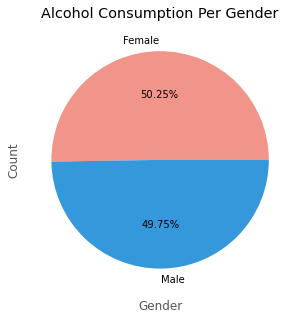

In [16]:
plt.figure(figsize=(10,5))
colors = ["#F1948A", "#3498DB"]
ax = df['Gender'].value_counts() \
     .plot(kind='pie', title="Alcohol Consumption Per Gender", autopct='%1.2f%%', colors=colors)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.grid()
plt.show()

The visualization above shows that the dataset is fairly balanced in terms of Gender entries (rows). 50.25% of the entries is females and 49.75% is males. 

In [17]:
table = pd.pivot_table(df, values='Count',
                       index=['Gender', 'Continent'],
                       columns=['Year'], aggfunc=np.sum).fillna(0)

In [18]:
table

Year                     2001     2002     2003     2004     2005     2006  \
Gender Continent                                                             
Female Africa          5741.0   9052.0   6364.0   4345.0   6630.0   9562.0   
       Asia           51036.0  62760.0  46104.0  59101.0  49028.0  52502.0   
       Europe         31067.0  37785.0  31787.0  33654.0  36559.0  33673.0   
       North America   3952.0   7445.0   8626.0   8784.0  11191.0   9658.0   
       Oceania         1172.0    768.0    490.0   1036.0      0.0    706.0   
       South America  12824.0   6745.0  10940.0  10670.0   7102.0   7805.0   
Male   Africa          8347.0   8779.0   8969.0  12194.0   7404.0   6159.0   
       Asia           38229.0  56564.0  51335.0  56500.0  48586.0  50751.0   
       Europe         19654.0  32315.0  26593.0  27552.0  34206.0  34771.0   
       North America   5485.0  10917.0   6601.0  10287.0   5505.0   7287.0   
       Oceania         1511.0    536.0      0.0      0.0   1146.0   3476.0   
       South America   7514.0  10831.0  10799.0  10612.0  14307.0   7090.0   

Year                     2007     2008     2009     2010     2011     2012  \
Gender Continent                                                             
Female Africa          3572.0   6236.0   7847.0   5782.0   5933.0   1985.0   
       Asia           41038.0  45277.0  56700.0  57687.0  54358.0  12679.0   
       Europe         40575.0  30685.0  37322.0  36722.0  33642.0   5456.0   
       North America   4311.0   8286.0   7787.0   6788.0   7843.0   1961.0   
       Oceania         1976.0   2027.0      0.0      0.0      0.0     95.0   
       South America  14051.0  10564.0   9831.0   8846.0  11211.0   1191.0   
Male   Africa          4509.0   6623.0   9183.0   9450.0   6720.0   1239.0   
       Asia           57670.0  50397.0  39321.0  49061.0  49283.0  10992.0   
       Europe         30939.0  28965.0  39611.0  31784.0  37696.0   8512.0   
       North America   9283.0   5288.0   6654.0   4400.0   6036.0   2666.0   
       Oceania          769.0    758.0    328.0    500.0   1787.0    112.0   
       South America  14130.0  10322.0   9725.0   8583.0   9155.0   2242.0   

Year                     2019      2020  
Gender Continent                         
Female Africa         11768.0  101308.0  
       Asia           97258.0  794914.0  
       Europe         50266.0  481905.0  
       North America  10894.0  116765.0  
       Oceania         2474.0   14228.0  
       South America  22616.0  152679.0  
Male   Africa         16766.0   94975.0  
       Asia           85873.0  741353.0  
       Europe         59884.0  486142.0  
       North America  10181.0  120329.0  
       Oceania         1558.0   11557.0  
       South America  16297.0  164827.0

The pivot table allows us to look at the raw numbers, Count column in our case, with the continent column and gender both used as indexes and years as the columns. We are able to see the actual summed numbers of alcohol consumption by gender in each continent as the years roll by. Year 2020 shows an expontial increase in alcohol consumption.   

In [19]:
# Continent With More Entries In the Dataset
df['Continent'].value_counts().to_frame()

,Continent
Asia,5799
Europe,3741
South America,1189
North America,865
Africa,810
Oceania,96


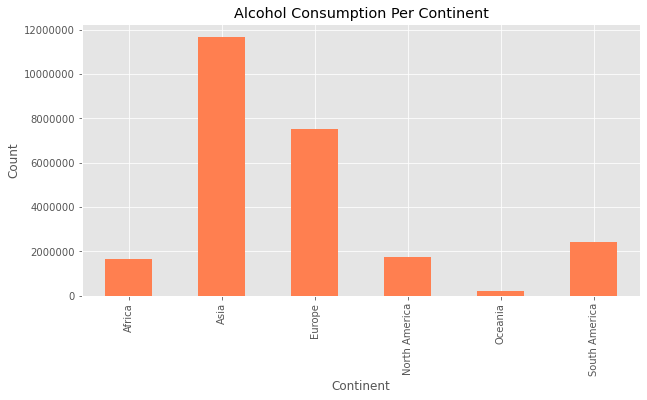

In [20]:
# Visualize Alcohol Consumption Per Continent
plt.figure(figsize=(10,5))
ax = df.groupby('Continent')['Year'].sum() \
    .plot(kind='bar', title='Alcohol Consumption Per Continent', color="coral")
plt.ticklabel_format(style='plain',axis='y')
ax.set_xlabel("Continent")
ax.set_ylabel("Count")
plt.show()

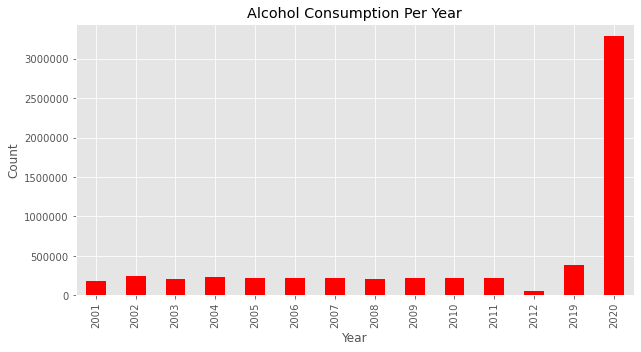

In [21]:
# Visualize alcohol Consumption Over The Years
plt.figure(figsize=(10,5))
ax = df.groupby('Year')['Count'].sum() \
    .plot(kind='bar', title='Alcohol Consumption Per Year',color='red')
plt.ticklabel_format(style='plain',axis='y')
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.show()

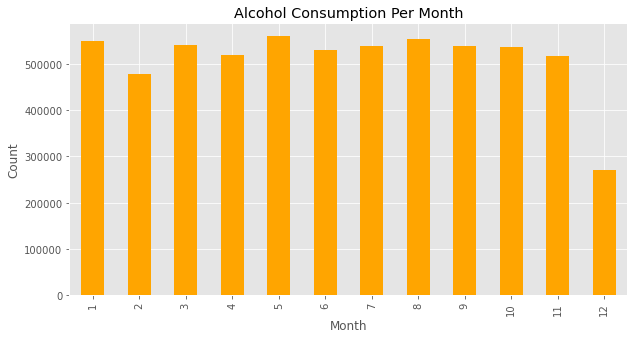

In [22]:
# Visualize total monthly alcohol consumption
plt.figure(figsize=(10,5))
ax = df.groupby('Month')['Count'].sum() \
    .plot(kind='bar', title='Alcohol Consumption Per Month',color='orange')
plt.ticklabel_format(style='plain',axis='y')
ax.set_xlabel("Month")
ax.set_ylabel("Count")
plt.show()

In [23]:
# Create a South African only df
df_SA = df[df['Countries']=="South Africa"]
df_SA.head()

,Gender,Count,Countries,Date,Year,Month,Continent
260,Male,261,South Africa,2019-12-23,2019,12,Africa
389,Male,390,South Africa,2019-12-13,2019,12,Africa
402,Male,403,South Africa,2012-09-19,2012,9,Africa
600,Male,101,South Africa,2020-11-19,2020,11,Africa
1038,Male,539,South Africa,2020-11-14,2020,11,Africa


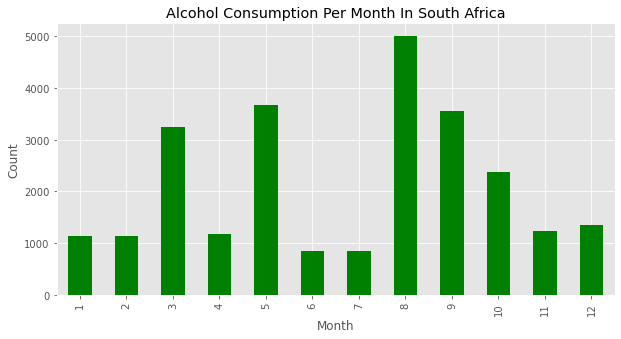

In [24]:
# Plot Alcohol Consumption Per Month In South Africa
plt.figure(figsize=(10,5))
ax = df_SA.groupby('Month')['Count'].sum() \
    .plot(kind='bar', title='Alcohol Consumption Per Month In South Africa',color='green')
plt.ticklabel_format(style='plain',axis='y')
ax.set_xlabel("Month")
ax.set_ylabel("Count")
plt.show()

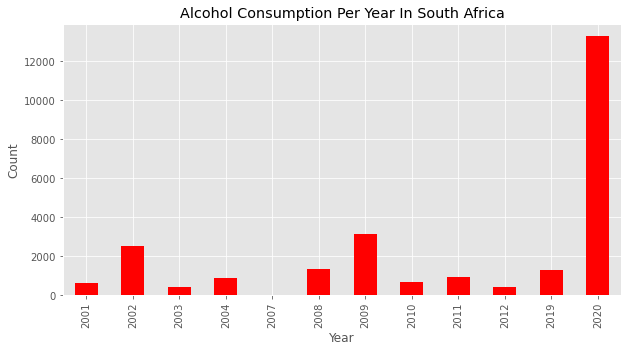

In [25]:
# Plot Alcohol Consumption Per Year In South Africa
plt.figure(figsize=(10,5))
ax = df_SA.groupby('Year')['Count'].sum() \
     .plot(kind='bar', title='Alcohol Consumption Per Year In South Africa',color='red')
plt.ticklabel_format(style='plain',axis='y')
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.show()

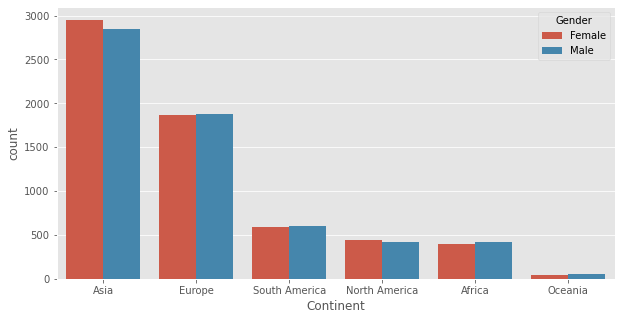

In [26]:
# Plot Gender based countplot
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Continent", hue="Gender")
plt.show()

In [27]:
df.columns

Index(['Gender', 'Count', 'Countries', 'Date', 'Year', 'Month', 'Continent'], dtype='object')

In [28]:
# Query & Group African Countries with equal or greater than 20 Entries(Rows) in the dataset

df.query('Continent == "Africa"') \
   .groupby("Countries")['Count'] \
   .agg(['count']) \
   .query("count >= 20")

,count
Countries,
Cameroon,36
Democratic Republic of the Congo,26
Egypt,41
Ethiopia,28
Kenya,24
Madagascar,38
Morocco,37
Nigeria,102
South Africa,52


##### 5. Conclusions

 1. Year 2020 shows a huge spike in alcohol consumption globally, this could be due to uncertainties and depression caused by the pandemic.  
 2. South Africans barely consume alcohol in June and July, the reason for that could because those are winter months in SA. 
 3. Asia accounts for a lot drinkers in the data and the countplot shows us that there's more Asian female drinkers than males.  